In [1]:
%matplotlib inline
import matplotlib.pylab as plt 
# routlines for analyzing odes
import sys
import pickle as pk
import numpy as np
import math
import analyzeGotran as ao
import subprocess as sb
from subprocess import PIPE
import shlex
import time
import ScriptRunner as SR
import matplotlib.pyplot as plt; plt.rcdefaults()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd

from spectrum import *

%matplotlib inline

In [2]:
time = 300
counter = 0
Kp = [5,10,15,20,25,30,35] #scipy.linspace(5,20,10)
p2x7 = scipy.linspace(0.01,1,10)
for i in np.arange(len(Kp)): # ATP
    data   = SR.gotranMicroglia(sim_time      = time,
                                    ATP           = 200,
                                    output_name   = 'test1',
                                    ode_file_name = 'p2xp2yMigration33', # 6 works
                                    kg_p2y        = Kp[i],
                                    data_name2    = 'TNFae',
                                    data_name3    = 'mRNA_TNF',
                                    data_name4    = 'Distance',
                                    data_name5    = 'GaGTP',
                                    data_name6    = 'DAG',
                                    DegSwitch     = 0,
                                    removePickle  = 1)
    
    if counter == 0:
            dura    = data[0]
            Ca      = data[1]
            tnfe    = data[2]
            mrna    = data[3]
            dist    = data[4]
            gprot   = data[5]
            ip3     = data[6]
            entry   = counter
            kp      = Kp[i]
    else:
            Ca      = np.vstack([Ca,data[1]])
            tnfe    = np.vstack([tnfe,data[2]])
            mrna    = np.vstack([mrna,data[3]])
            dist    = np.vstack([dist,data[4]])
            gprot   = np.vstack([gprot,data[5]])
            ip3     = np.vstack([ip3,data[6]])
            kp      = np.append(kp,Kp[i])
        
    counter = counter + 1 
        
import pandas as pd 

data = {
    'Kp': kp,
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 3.267150640487671 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.672929525375366 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.6716315746307373 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.1584153175354 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.177939176559448 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.273353576660156 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.360125780105591 seconds --------------
 ------------ End of Simulation -----------


,Kp
0,5
1,10
2,15
3,20
4,25
5,30
6,35


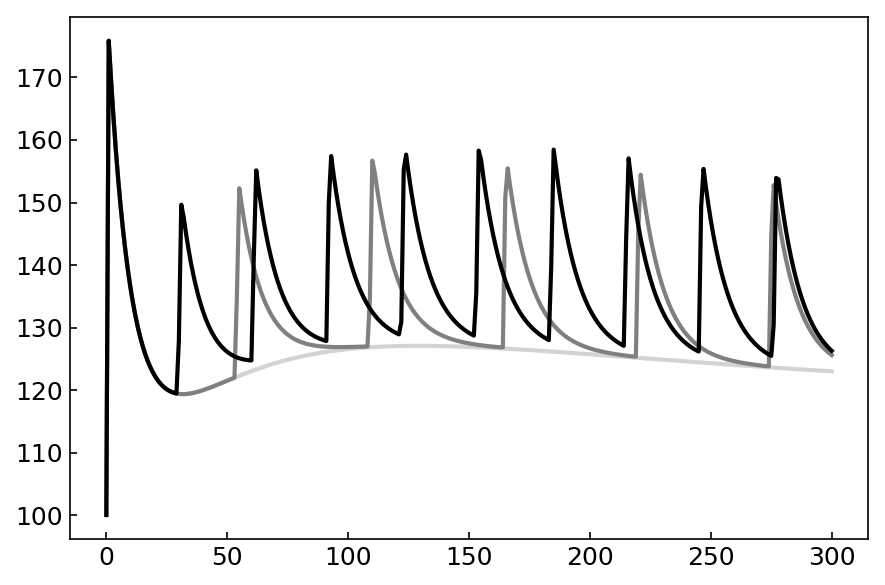

In [4]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura,Ca[0],'lightgray',alpha=1,lw=2)
#plt.plot(dura,Ca[1])
#plt.plot(dura,Ca[2])
plt.plot(dura,Ca[1],'gray',alpha=1,lw=2)
#plt.plot(dura,Ca[4])
#plt.plot(dura,Ca[5])
plt.plot(dura,Ca[2],'black',alpha=1,lw=2)
plt.tight_layout()


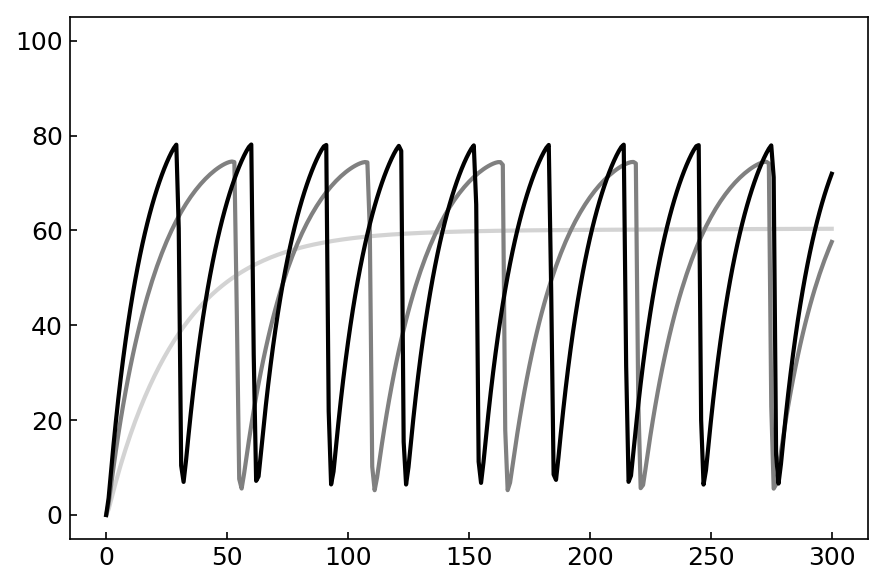

In [15]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura,gprot[0],'lightgray',alpha=1,lw=2)
#plt.plot(dura,Ca[1])
#plt.plot(dura,Ca[2])
plt.plot(dura,gprot[1],'gray',alpha=1,lw=2)
#plt.plot(dura,Ca[4])
#plt.plot(dura,Ca[5])
plt.plot(dura,gprot[2],'black',alpha=1,lw=2)
#plt.plot(dura,Ca[7])
plt.ylim([-5,105])
plt.tight_layout()


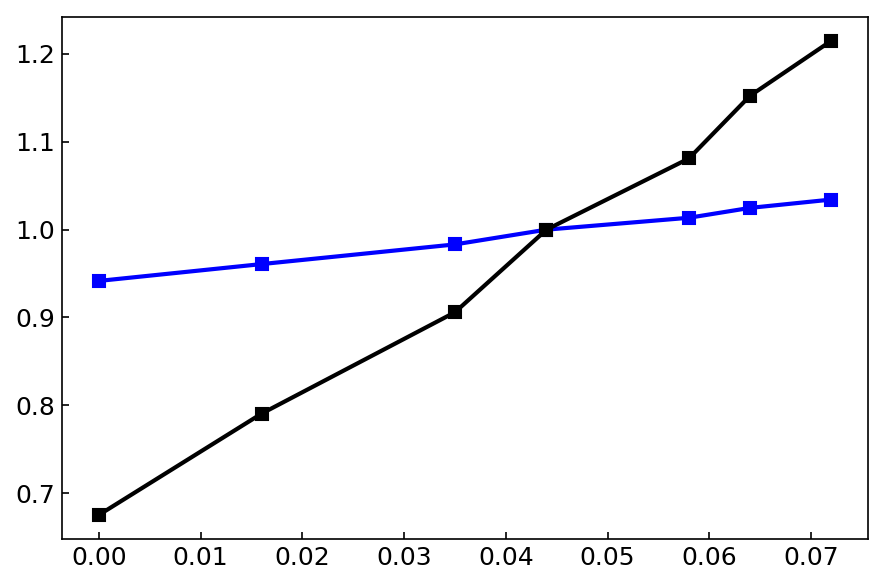

In [21]:
distdummy = np.zeros(7)
tnfdummy = np.zeros(7)
for i in np.arange(7):
    distdummy[i] = dist[i][300]
    tnfdummy[i] = tnfe[i][300]
dist_data = distdummy / distdummy[3]    
tnf_data = (tnfdummy - tnfe[0][0]) / (tnfdummy[3]-tnfe[0][0])

frequency = [0.0,0.016,0.035,0.044,0.058,0.064,0.072]

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(frequency,dist_data,'bs-',lw=2,alpha=1,label="Migration")
plt.plot(frequency,tnf_data,'ks-',lw=2,alpha=1,label="TNFa")
#plt.legend(loc=0,fontsize=9)
#plt.xlabel("Freq. (Hz)",fontsize=12)
#plt.ylabel("Relative degree of response",fontsize=12)
plt.tight_layout()
#plt.savefig("Cafreq.png")


In [16]:
time = 300
counter = 0
#Kp = [10,15,20,25,30,35,40,45] #scipy.linspace(5,20,10)
p2x7 = [0.01,0.1,0.5,1,1.5,2,2.5,5]
for i in np.arange(len(p2x7)): # ATP
    data   = SR.gotranMicroglia(sim_time      = time,
                                    ATP           = 200,
                                    output_name   = 'test1',
                                    ode_file_name = 'p2xp2yMigration33', # 6 works
                                    rhop2x7       = p2x7[i],
                                    data_name2    = 'TNFae',
                                    data_name3    = 'mRNA_TNF',
                                    data_name4    = 'Distance',
                                    DegSwitch     = 0,
                                    removePickle  = 1)
    
    if counter == 0:
            dura    = data[0]
            Ca      = data[1]
            tnfe    = data[2]
            mrna    = data[3]
            dist    = data[4]
            entry   = counter
            p2x7z      = p2x7[i]
    else:
            Ca      = np.vstack([Ca,data[1]])
            tnfe    = np.vstack([tnfe,data[2]])
            mrna    = np.vstack([mrna,data[3]])
            dist    = np.vstack([dist,data[4]])
            p2x7z      = np.append(p2x7z,p2x7[i])
        
    counter = counter + 1 
        
import pandas as pd 

data = {
    'p2x7': p2x7,
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 3.828094244003296 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.14548134803772 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.095533847808838 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.079141855239868 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.788123369216919 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.065334320068359 seconds --------------
 ------------ End of Simulation -----------


KeyboardInterrupt: 

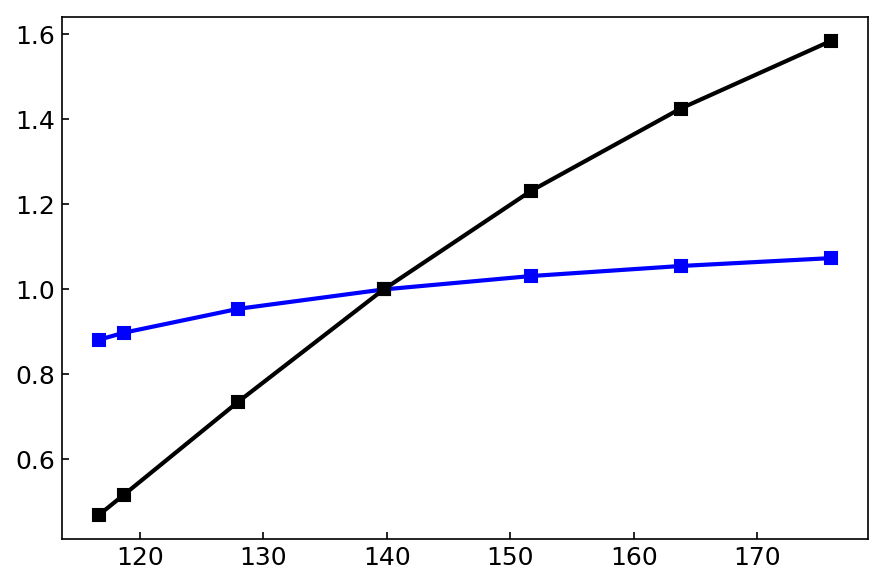

In [10]:
distdummy = np.zeros(7)
tnfdummy = np.zeros(7)
for i in np.arange(7):
    distdummy[i] = dist[i][300]
    tnfdummy[i] = tnfe[i][300]
dist_data = distdummy / distdummy[3]    
tnf_data = (tnfdummy - tnfe[0][0]) / (tnfdummy[3]-tnfe[0][0])

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(Ca_elev,dist_data,'bs-',lw=2,alpha=1,label="Migration")
plt.plot(Ca_elev,tnf_data,'ks-',lw=2,alpha=1,label="TNFa")
#plt.legend(loc=0,fontsize=9)
#plt.xlabel("$[Ca^{2+}]_i$. (nM)",fontsize=12)
#plt.ylabel("Relative degree of response",fontsize=12)
plt.tight_layout()
#plt.savefig("Caelev.png")